In [171]:
import sys
import os
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas as pd

In [172]:
sys.path.append("../")


In [173]:
from scripts.data_loader import load_data_from_postgres,load_data_using_sqlalchemy,execute_query,top_5_handsets_for_top_3_manufacturers



In [174]:
# SQL query to load all column and all rows of the dataset in the postgresql database
query = "SELECT * FROM xdr_data;"  

# Load data: defined in scripts\dataloader at load_data_from_postgres function
df = load_data_from_postgres(query)
df.head()




c:\Users\bethelhem.teka\OneDrive - Catholic Relief Services\Desktop\Week2-Task03-05-final\KAIM-Week2\notebooks\..\scripts\data_loader.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# EDA

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

## Treating Missing Values

In [176]:
# Check for missing values
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [177]:
from scripts.data_cleaner import clean_missing_data, clean_outlier
clean_missing_data(df,'replace_with_mode', 'MSISDN/Number')
clean_missing_data(df,'replace_with_mode', 'Handset Type')
clean_missing_data(df,'replace_with_mode', 'Handset Manufacturer')
clean_missing_data(df,'replace_with_mean', 'Social Media DL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Social Media UL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Google DL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Google UL (Bytes)')
clean_missing_data(df,'remove', 'End')
clean_missing_data(df,'replace_with_mean', 'Youtube DL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Youtube UL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Netflix DL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Netflix UL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Email DL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Email UL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Gaming DL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Gaming UL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Other DL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Other UL (Bytes)')
clean_missing_data(df,'replace_with_mean', 'Dur. (ms)')


df.head()



successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed
successfully completed


c:\Users\bethelhem.teka\OneDrive - Catholic Relief Services\Desktop\Week2-Task03-05-final\KAIM-Week2\notebooks\..\scripts\data_cleaner.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)
c:\Users\bethelhem.teka\OneDrive - Catholic Relief Services\Desktop\Week2-Task03-05-final\KAIM-Week2\notebooks\..\scripts\data_cleaner.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change i

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### Treating Outliers

In [178]:
from scripts.data_cleaner import clean_outlier
clean_outlier(df,'replace_with_mean', df['Dur. (ms)'])

An error occurred: "None of [Index([         1823652.0,          1365104.0,          1361762.0,\n                1321509.0,          1089009.0,          1074638.0,\n                1035261.0,           951292.0,           941634.0,\n                 864482.0,\n       ...\n                  61661.0,            84940.0,           125622.0,\n                 113545.0,            59587.0,            81230.0,\n                  97970.0,            98249.0,            97910.0,\n       104608.56034666667],\n      dtype='float64', length=150001)] are in the [columns]"


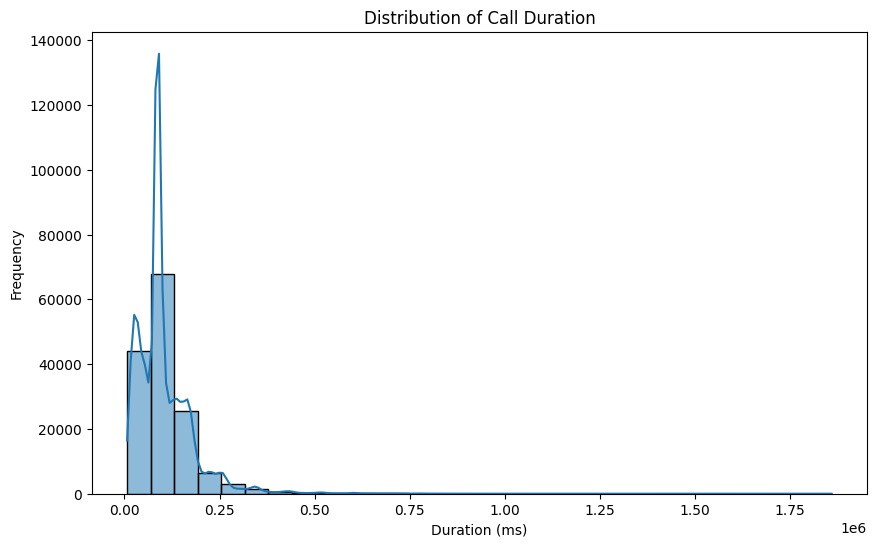

In [179]:
# Histogram for a specific column
plt.figure(figsize=(10, 6))
sns.histplot(df['Dur. (ms)'], bins=30, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()

## # **Task 01 - Query Execution**

#### Top 10 handsets used by the customers


In [180]:
# Top 10 handsets used by the customers
query = 'select "Handset Type", count(distinct "MSISDN/Number")  FROM xdr_data group by "Handset Type" order by count(*) desc limit 10;'
df1=execute_query(query)
df1


,Handset Type,count
0,Huawei B528S-23A,10616
1,Apple iPhone 6S (A1688),6759
2,Apple iPhone 6 (A1586),6260
3,undefined,6671
4,Apple iPhone 7 (A1778),4699
5,Apple iPhone Se (A1723),3755
6,Apple iPhone 8 (A1905),3543
7,Apple iPhone Xr (A2105),3073
8,Samsung Galaxy S8 (Sm-G950F),3245
9,Apple iPhone X (A1901),2649


#### Top 3 handset manufacturers

In [181]:
# Top 3 handset manufacturers
query = 'select "Handset Manufacturer", count(distinct "IMEI")  FROM xdr_data group by "Handset Manufacturer" order by count(*) desc limit 10;'
df1=execute_query(query)
df1

,Handset Manufacturer,count
0,Apple,42687
1,Samsung,30981
2,Huawei,21743
3,undefined,6716
4,Sony Mobile Communications Ab,812
5,Wiko Global Sasu,716
6,None,0
7,Xiaomi Communications Co Ltd,376
8,Oneplus Technology (Shenzhen) Co Ltd,299
9,Asustek,264


#### Top 5 handsets per top 3 manufacturers

In [182]:
from scripts.data_loader import top_5_handsets_for_top_3_manufacturers
df1= top_5_handsets_for_top_3_manufacturers()
df1


,Handset Manufacturer,Handset Type
0,Apple,Apple iPhone 6S (A1688)
1,Apple,Apple iPhone 6S (A1688)
2,Apple,Apple iPhone 6S (A1688)
3,Apple,Apple iPhone 8 Plus (A1897)
4,Apple,Apple iPhone 6S (A1688)
5,Huawei,Huawei E5180
6,Huawei,Huawei B528S-23A
7,Huawei,Huawei B528S-23A
8,Huawei,Huawei B528S-23A
9,Huawei,Huawei B528S-23A


## Calculate Decile

In [183]:
df['Decile'] = pd.qcut(df['Total DL (Bytes)'], q=10, labels=False) + 1  # Deciles labeled from 1 to 10

# Group by decile and calculate aggregate statistics (sum, mean, count, etc.)
decile_stats = df.groupby('Decile')['Dur. (ms)'].agg(['count', 'mean', 'sum']).sort_values(by='sum', ascending=False)

# Get the top 5 decile classes based on sum
top_5_deciles = df[df['Decile'] >= 6]


decile_metrics = top_5_deciles.groupby('Decile').agg(
    Total_Duration=('Dur. (ms)', 'sum'),
    Total_Data=('Total DL (Bytes)', 'sum')
).reset_index()
print(top_5_deciles)

           Bearer Id            Start  Start ms              End  End ms  \
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
5       1.311448e+19  4/12/2019 21:37     439.0   4/25/2019 8:08   553.0   
7       1.304243e+19   4/14/2019 2:11     592.0   4/25/2019 2:26   512.0   
...              ...              ...       ...              ...     ...   
149994  1.311448e+19   4/29/2019 7:28      83.0  4/30/2019 15:01   268.0   
149995  1.304243e+19   4/29/2019 7:28     615.0   4/30/2019 0:01   407.0   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
1       1365104.0  2.08

## Calculate Dispersion

In [184]:
from scripts.data_cleaner import calculate_dispersion

dict=calculate_dispersion(df['Dur. (ms)'])
dict



dict2=calculate_dispersion(df['Total DL (Bytes)'])
dict2

{'Data Range': np.float64(895855575.0),
 'Data Variance': np.float64(5.9605743108713816e+16),
 'Data STD DEV': np.float64(244142874.37628365),
 'Data IQR': np.float64(422598741.0),
 'Data CV': np.float64(0.5369985756395482)}

#### Univariate Visualization

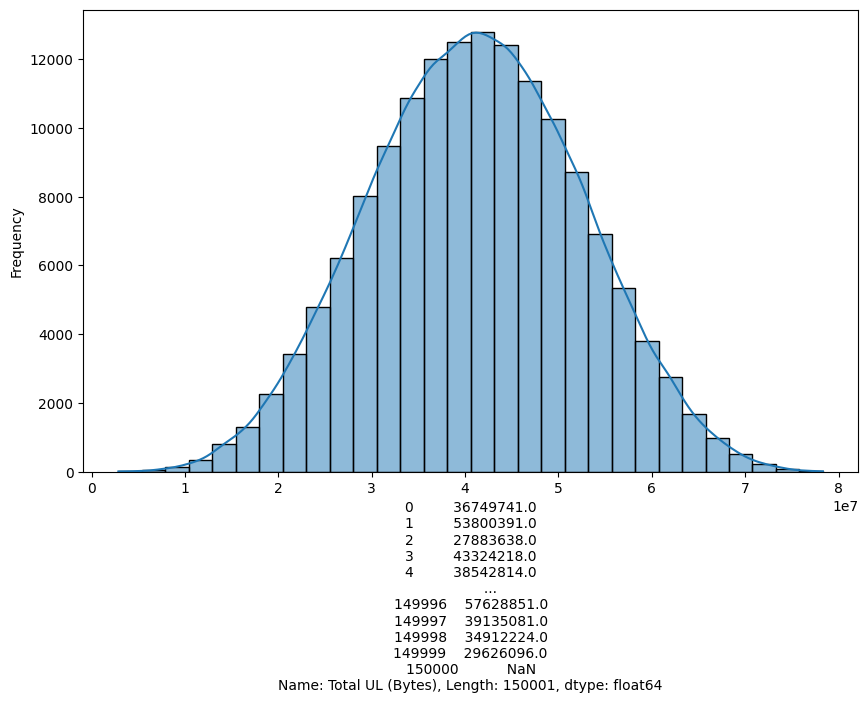

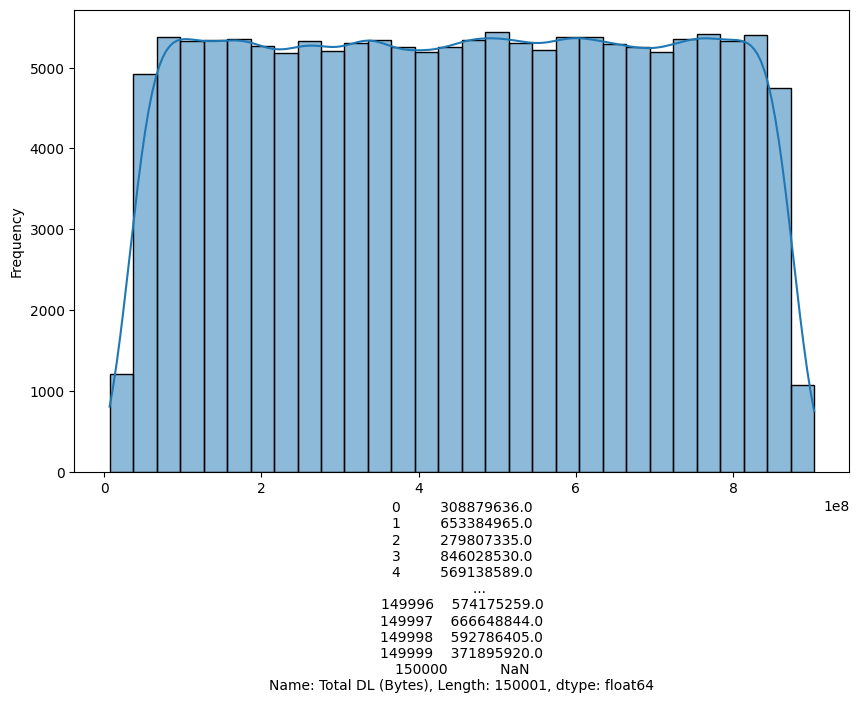

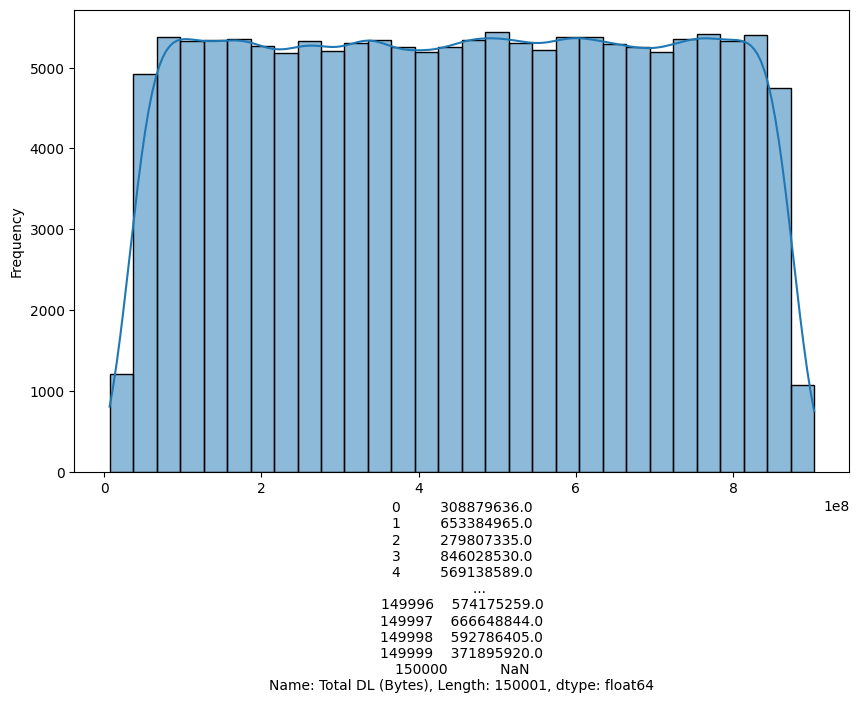

In [185]:
from scripts.data_visualizer import visualize_bivariate, visualize_univariate
visualize_univariate('histplot',df,df['Total UL (Bytes)'])
visualize_univariate('histplot',df,df['Total DL (Bytes)'])
visualize_univariate('histplot',df,df['Total DL (Bytes)'])







#### Bivariate Visualization

c:\Users\bethelhem.teka\OneDrive - Catholic Relief Services\Desktop\Week2-Task03-05-final\KAIM-Week2\notebooks\..\scripts\data_visualizer.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x=x_axis, y=y_axis, palette = 'viridis')


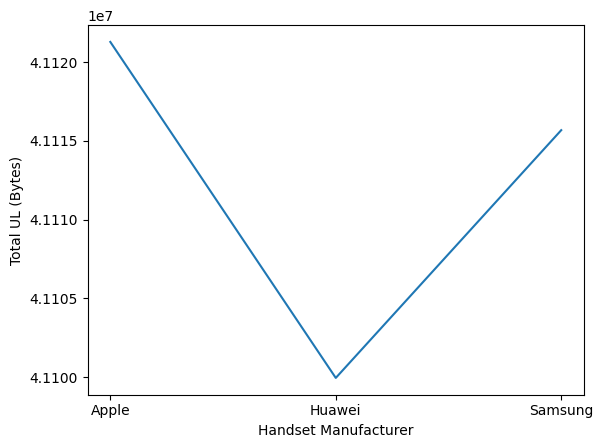

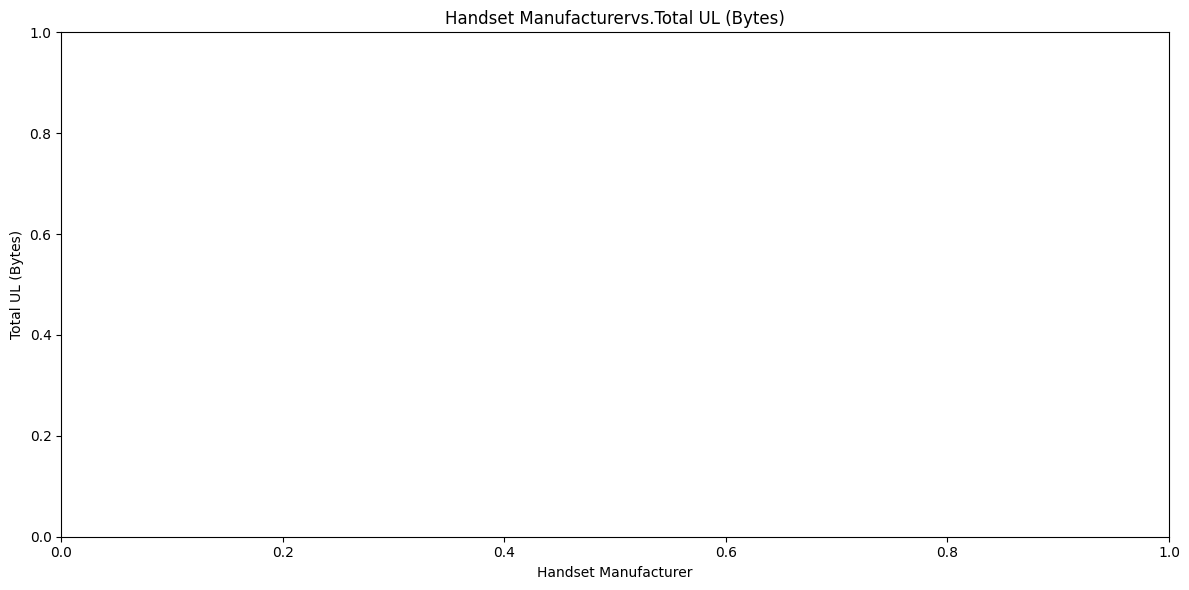

In [186]:
# filter out for the top 5 handsets over top 3 manufacturers

df2= top_5_handsets_for_top_3_manufacturers()
filtered_df = df[df['Handset Manufacturer'].isin(df2['Handset Manufacturer'])]
average_UL_bytes = filtered_df.groupby('Handset Manufacturer')['Total UL (Bytes)'].mean().reset_index()

# visualize a linechart
visualize_bivariate('lineplot',average_UL_bytes,'Handset Manufacturer','Total UL (Bytes)')


In [187]:
df.dropna(subset=['Start'], how='any')
null_values_in_name = df['Start'].isnull().sum() 

print(null_values_in_name)

1


#### Data Usage by Applications

C:\Users\bethelhem.teka\AppData\Local\Temp\ipykernel_22336\2479317341.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x600 with 0 Axes>

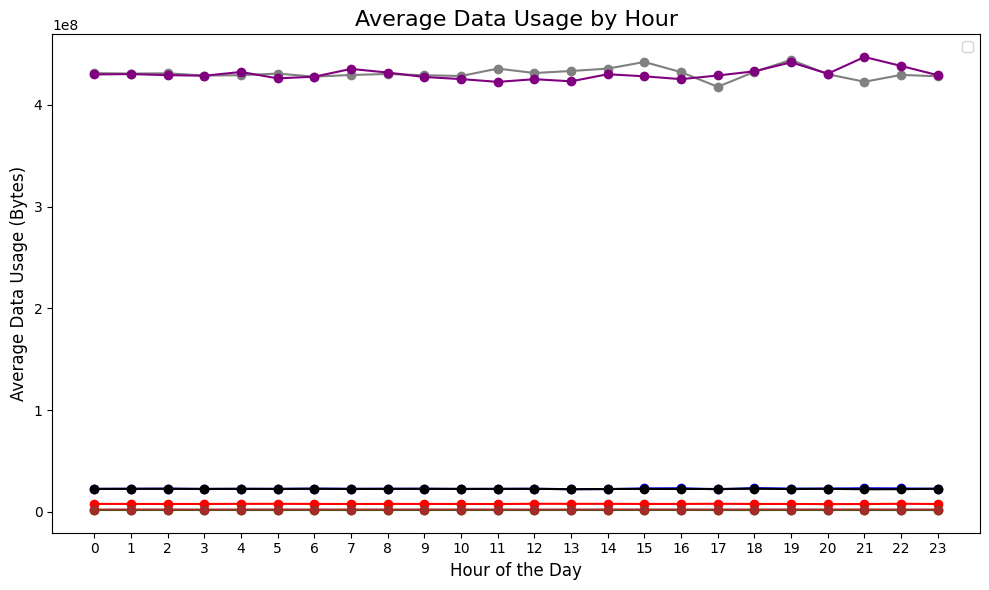

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df2= top_5_handsets_for_top_3_manufacturers()
filtered_df = df[df['Handset Manufacturer'].isin(df2['Handset Manufacturer'])]
filtered_df.head()

df['End'] = pd.to_datetime(df['End'])

# Calculate total data usage (download + upload)
df['Total_Youtube_Data'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Total_Google_Data'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Total_Social_Media_Data']=df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Total_Email_Data']=df['Email DL (Bytes)'] +df['Email UL (Bytes)']
df['Total_Netflix_Data']= df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Total_Gaming_Data']=df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Total_Other_Data']=df['Other DL (Bytes)'] + df['Other UL (Bytes)']

# Extract hour from the 'Timestamp' column
df['Hour'] = df['End'].dt.hour

# Group by 'Hour' and calculate the average total data usage
avg_data_usage_by_hour_youtube = df.groupby('Hour')['Total_Youtube_Data'].mean().reset_index()
avg_data_usage_by_hour_google = df.groupby('Hour')['Total_Google_Data'].mean().reset_index()

avg_data_usage_by_hour_social_media = df.groupby('Hour')['Total_Social_Media_Data'].mean().reset_index()
avg_data_usage_by_hour_email = df.groupby('Hour')['Total_Email_Data'].mean().reset_index()
avg_data_usage_by_hour_netflix = df.groupby('Hour')['Total_Netflix_Data'].mean().reset_index()
avg_data_usage_by_hour_gaming = df.groupby('Hour')['Total_Gaming_Data'].mean().reset_index()
avg_data_usage_by_hour_other = df.groupby('Hour')['Total_Other_Data'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_data_usage_by_hour_youtube['Hour'], avg_data_usage_by_hour_youtube['Total_Youtube_Data'], marker='o', linestyle='-', color='b')
plt.plot(avg_data_usage_by_hour_google['Hour'], avg_data_usage_by_hour_google['Total_Google_Data'], marker='o', linestyle='-', color='red')
plt.plot(avg_data_usage_by_hour_social_media['Hour'], avg_data_usage_by_hour_social_media['Total_Social_Media_Data'], marker='o', linestyle='-', color='green')
plt.plot(avg_data_usage_by_hour_email['Hour'], avg_data_usage_by_hour_email['Total_Email_Data'], marker='o', linestyle='-', color='brown')
plt.plot(avg_data_usage_by_hour_netflix['Hour'], avg_data_usage_by_hour_netflix['Total_Netflix_Data'], marker='o', linestyle='-', color='black')
plt.plot(avg_data_usage_by_hour_gaming['Hour'], avg_data_usage_by_hour_gaming['Total_Gaming_Data'], marker='o', linestyle='-', color='gray')
plt.plot(avg_data_usage_by_hour_other['Hour'], avg_data_usage_by_hour_other['Total_Other_Data'], marker='o', linestyle='-', color='purple')


# Add labels, legend, and title
plt.title('Average Data Usage by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Data Usage (Bytes)', fontsize=12)
#plt.grid(True)
plt.xticks(range(0, 24))  # Set x-ticks to cover all 24 hours
plt.legend()

plt.tight_layout()


# Show the plot
plt.show()

#### Correlations among applications data usage

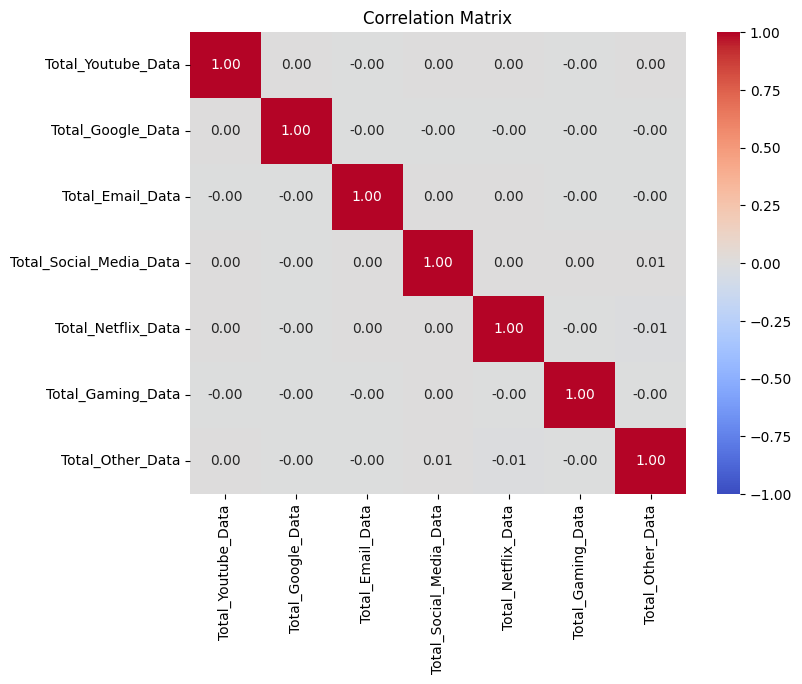

In [189]:
selected_columns = ['Total_Youtube_Data', 'Total_Google_Data', 'Total_Email_Data', 'Total_Social_Media_Data','Total_Netflix_Data','Total_Gaming_Data','Total_Other_Data']

correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()

#### Conduct Dimentionality Reduction

# Task 02

##### ### ## Aggregating User engagement metrices (Session Frequency, Session Duration and Data Volume) to rank top 10 customers

In [190]:
#Aggregate the engagement metrics per customer (MSISDN)
df['Total Bytes'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
aggregated_data = df.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_traffic=('Total Bytes', 'sum')  
).reset_index()

# Step 2: Report top 10 customers per engagement metric
top_10_sessions = aggregated_data.nlargest(10, 'sessions_frequency')
top_10_duration = aggregated_data.nlargest(10, 'total_duration')
top_10_traffic = aggregated_data.nlargest(10, 'total_traffic')

print("Top 10 Customers by Sessions Frequency:\n", top_10_sessions)
print("\nTop 10 Customers by Total Duration:\n", top_10_duration)
print("\nTop 10 Customers by Total Traffic:\n", top_10_traffic)

Top 10 Customers by Sessions Frequency:
        MSISDN/Number  sessions_frequency  total_duration  total_traffic
13526   3.362632e+10                 522    8.134293e+07   5.392201e+11
6437    3.361489e+10                  17    9.966898e+06   8.846226e+09
13180   3.362578e+10                  17    1.855375e+07   8.499621e+09
37052   3.365973e+10                  16    4.035428e+06   7.705863e+09
76363   3.367588e+10                  15    4.865947e+06   7.891111e+09
92923   3.376054e+10                  15    9.279434e+06   8.514774e+09
65118   3.366716e+10                  13    8.744914e+06   5.618394e+09
666     3.360313e+10                  12    6.287761e+06   4.976195e+09
1279    3.360452e+10                  12    5.207990e+06   5.487855e+09
13994   3.362708e+10                  12    4.703516e+06   5.754731e+09

Top 10 Customers by Total Duration:
        MSISDN/Number  sessions_frequency  total_duration  total_traffic
13526   3.362632e+10                 522    8.134293e+07 

#####  Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

In [191]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Normalize each engagement metric using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = aggregated_data[['sessions_frequency', 'total_duration', 'total_traffic']]
normalized_data = scaler.fit_transform(normalized_data)

# Run K-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_data['engagement_group'] = kmeans.fit_predict(normalized_data)

# View the final clustered data
print("\nCustomer Engagement Groups:\n", aggregated_data[['MSISDN/Number', 'engagement_group']])

# Optionally, analyze the clusters
print("\nCluster Centers:\n", kmeans.cluster_centers_)


Customer Engagement Groups:
         MSISDN/Number  engagement_group
0        3.360100e+10                 0
1        3.360100e+10                 0
2        3.360100e+10                 0
3        3.360101e+10                 0
4        3.360101e+10                 0
...               ...               ...
106851   3.379000e+10                 0
106852   3.379000e+10                 0
106853   3.197021e+12                 2
106854   3.370000e+14                 0
106855   8.823971e+14                 2

[106856 rows x 2 columns]

Cluster Centers:
 [[0.00230515 0.00131055 0.0010446 ]
 [1.         1.         1.        ]
 [0.00630711 0.00576963 0.00300762]]


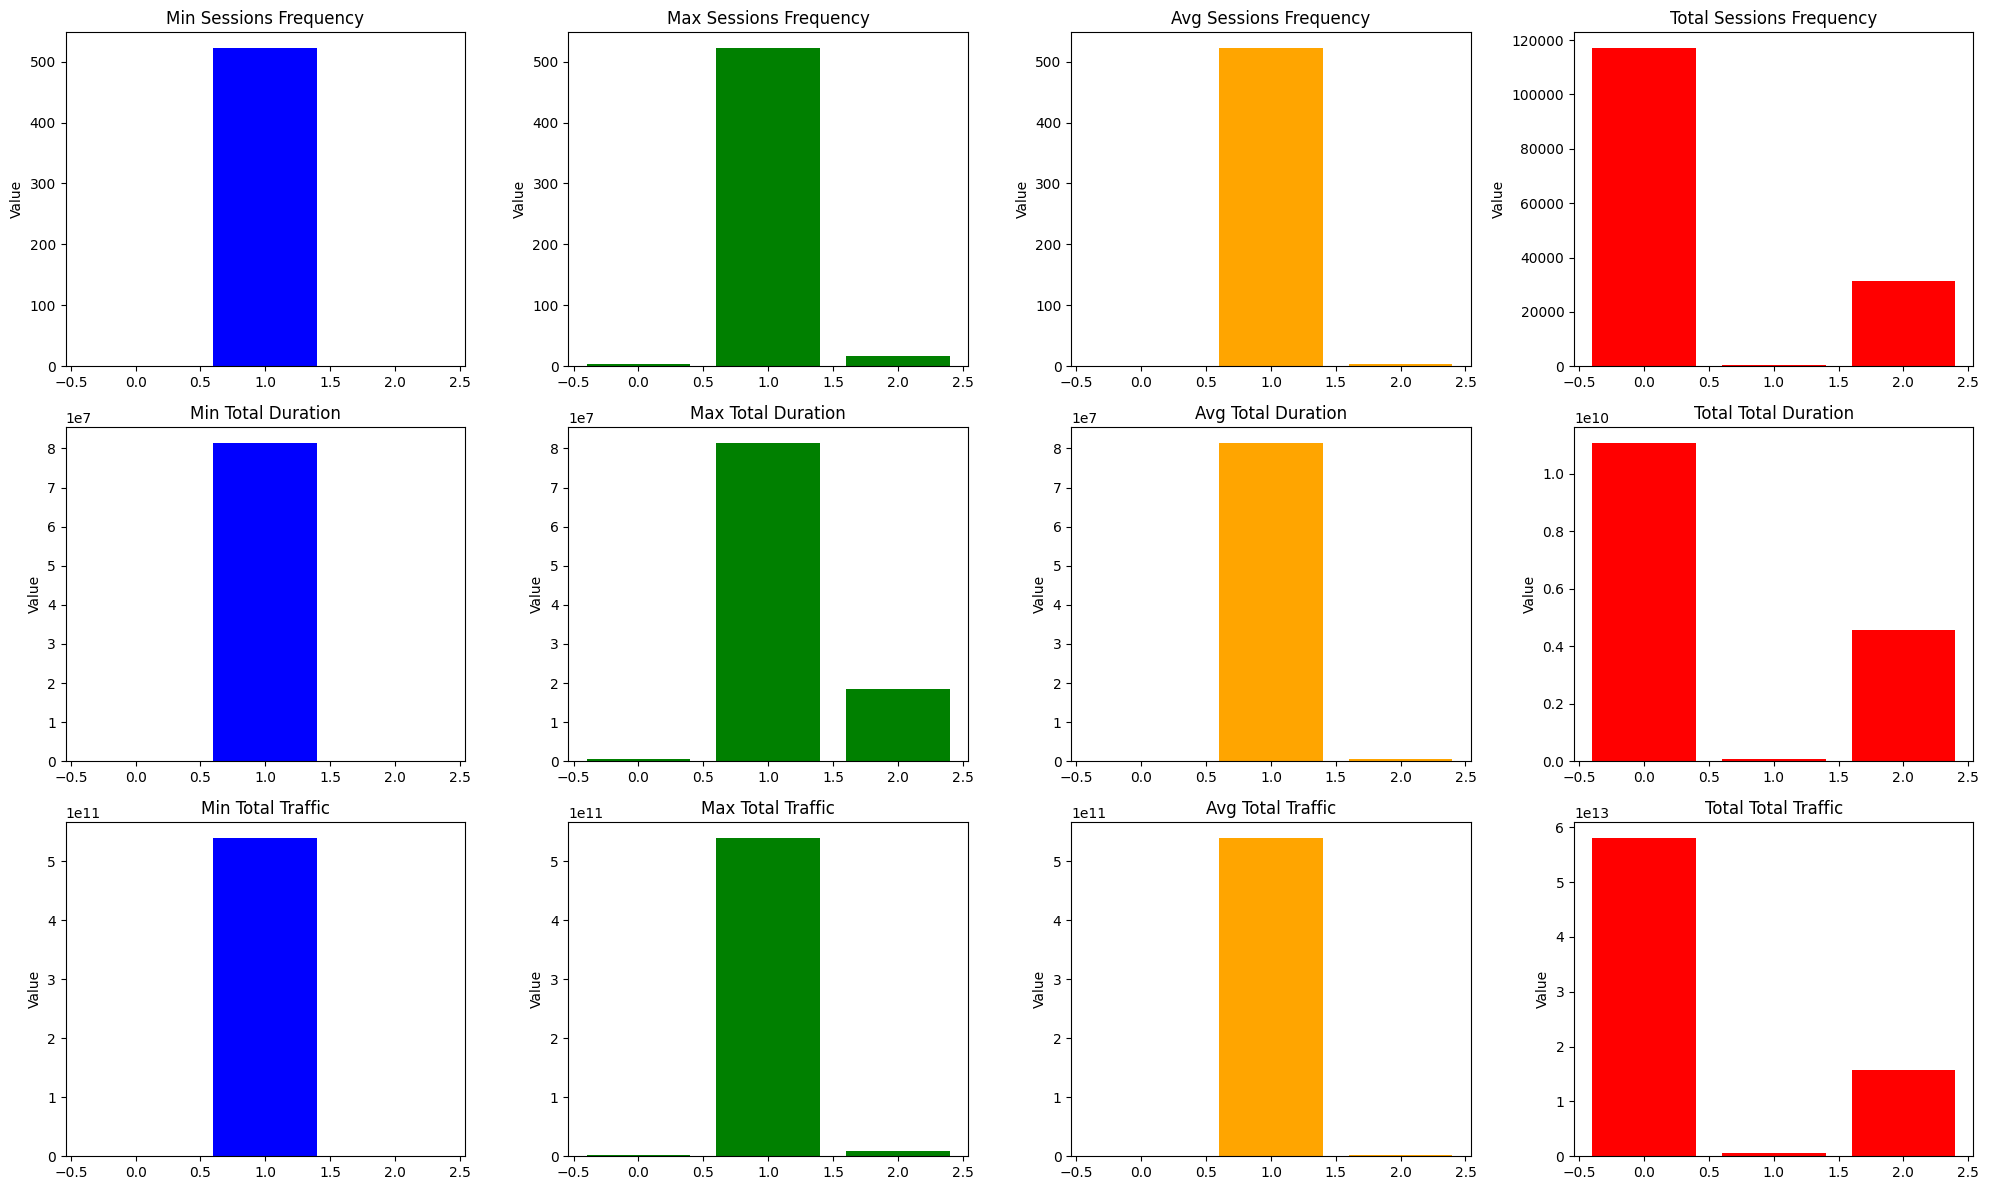

   engagement_group  min_sessions_frequency  max_sessions_frequency  \
0                 0                       0                       3   
1                 1                     522                     522   
2                 2                       1                      17   

   avg_sessions_frequency  total_sessions_frequency  min_total_duration  \
0                1.202827                    117005        7.142000e+03   
1              522.000000                       522        8.134293e+07   
2                3.286326                     31483        4.689600e+04   

   max_total_duration  avg_total_duration  total_total_duration  \
0        5.270450e+05        1.136336e+05          1.105371e+10   
1        8.134293e+07        8.134293e+07          8.134293e+07   
2        1.855375e+07        4.756096e+05          4.556340e+09   

   min_total_traffic  max_total_traffic  avg_total_traffic  \
0       3.324901e+07       2.439177e+09       5.962546e+08   
1       5.392201e+11 

In [192]:

# Compute the required statistics (min, max, avg, total) per cluster
cluster_stats = aggregated_data.groupby('engagement_group').agg(
    min_sessions_frequency=('sessions_frequency', 'min'),
    max_sessions_frequency=('sessions_frequency', 'max'),
    avg_sessions_frequency=('sessions_frequency', 'mean'),
    total_sessions_frequency=('sessions_frequency', 'sum'),
    
    min_total_duration=('total_duration', 'min'),
    max_total_duration=('total_duration', 'max'),
    avg_total_duration=('total_duration', 'mean'),
    total_total_duration=('total_duration', 'sum'),
    
    min_total_traffic=('total_traffic', 'min'),
    max_total_traffic=('total_traffic', 'max'),
    avg_total_traffic=('total_traffic', 'mean'),
    total_total_traffic=('total_traffic', 'sum')
).reset_index()

# Visualize the statistics
# Create subplots for each metric (sessions frequency, total duration, total traffic)
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
metrics = ['sessions_frequency', 'total_duration', 'total_traffic']
metric_labels = ['Sessions Frequency', 'Total Duration', 'Total Traffic']

for i, metric in enumerate(metrics):
    # Select the relevant data for the metric
    min_col = f"min_{metric}"
    max_col = f"max_{metric}"
    avg_col = f"avg_{metric}"
    total_col = f"total_{metric}"
    
    # Plot min, max, avg, and total for each cluster
    axes[i, 0].bar(cluster_stats['engagement_group'], cluster_stats[min_col], color='blue')
    axes[i, 0].set_title(f"Min {metric_labels[i]}")
    axes[i, 0].set_ylabel('Value')
    
    axes[i, 1].bar(cluster_stats['engagement_group'], cluster_stats[max_col], color='green')
    axes[i, 1].set_title(f"Max {metric_labels[i]}")
    axes[i, 1].set_ylabel('Value')
    
    axes[i, 2].bar(cluster_stats['engagement_group'], cluster_stats[avg_col], color='orange')
    axes[i, 2].set_title(f"Avg {metric_labels[i]}")
    axes[i, 2].set_ylabel('Value')
    
    axes[i, 3].bar(cluster_stats['engagement_group'], cluster_stats[total_col], color='red')
    axes[i, 3].set_title(f"Total {metric_labels[i]}")
    axes[i, 3].set_ylabel('Value')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Interpret the findings (print the stats to give context)
print(cluster_stats)


##### Top 10 most engaged user per applications

Top 10 most engaged users for Total_Google_Data:
       MSISDN/Number  Total_Google_Data
92924   3.363243e+10         15528782.0
48788   3.366485e+10         15517324.0
80845   3.366092e+10         15508567.0
27395   3.365976e+10         15507131.0
3333    3.366466e+10         15506449.0
53083   3.366733e+10         15506141.0
82620   3.366775e+10         15493921.0
90242   3.377121e+10         15483654.0
16860   3.366485e+10         15481311.0
74113   3.364367e+10         15479714.0


Top 10 most engaged users for Total_Youtube_Data:
        MSISDN/Number  Total_Youtube_Data
66497    3.368757e+10          45190078.0
102100   3.366957e+10          45179008.0
15654    3.366407e+10          45170035.0
107607   3.366319e+10          45162724.0
135104   3.367443e+10          45158398.0
118058   3.376144e+10          45110515.0
45407    3.366740e+10          45108826.0
134565   3.360573e+10          45104757.0
13822    3.366455e+10          45093369.0
68232    3.366295e+10          45091533

C:\Users\bethelhem.teka\AppData\Local\Temp\ipykernel_22336\3681004421.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_per_application[app], x='MSISDN/Number', y=app, palette='viridis')
C:\Users\bethelhem.teka\AppData\Local\Temp\ipykernel_22336\3681004421.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_per_application[app], x='MSISDN/Number', y=app, palette='viridis')
C:\Users\bethelhem.teka\AppData\Local\Temp\ipykernel_22336\3681004421.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_per_appl

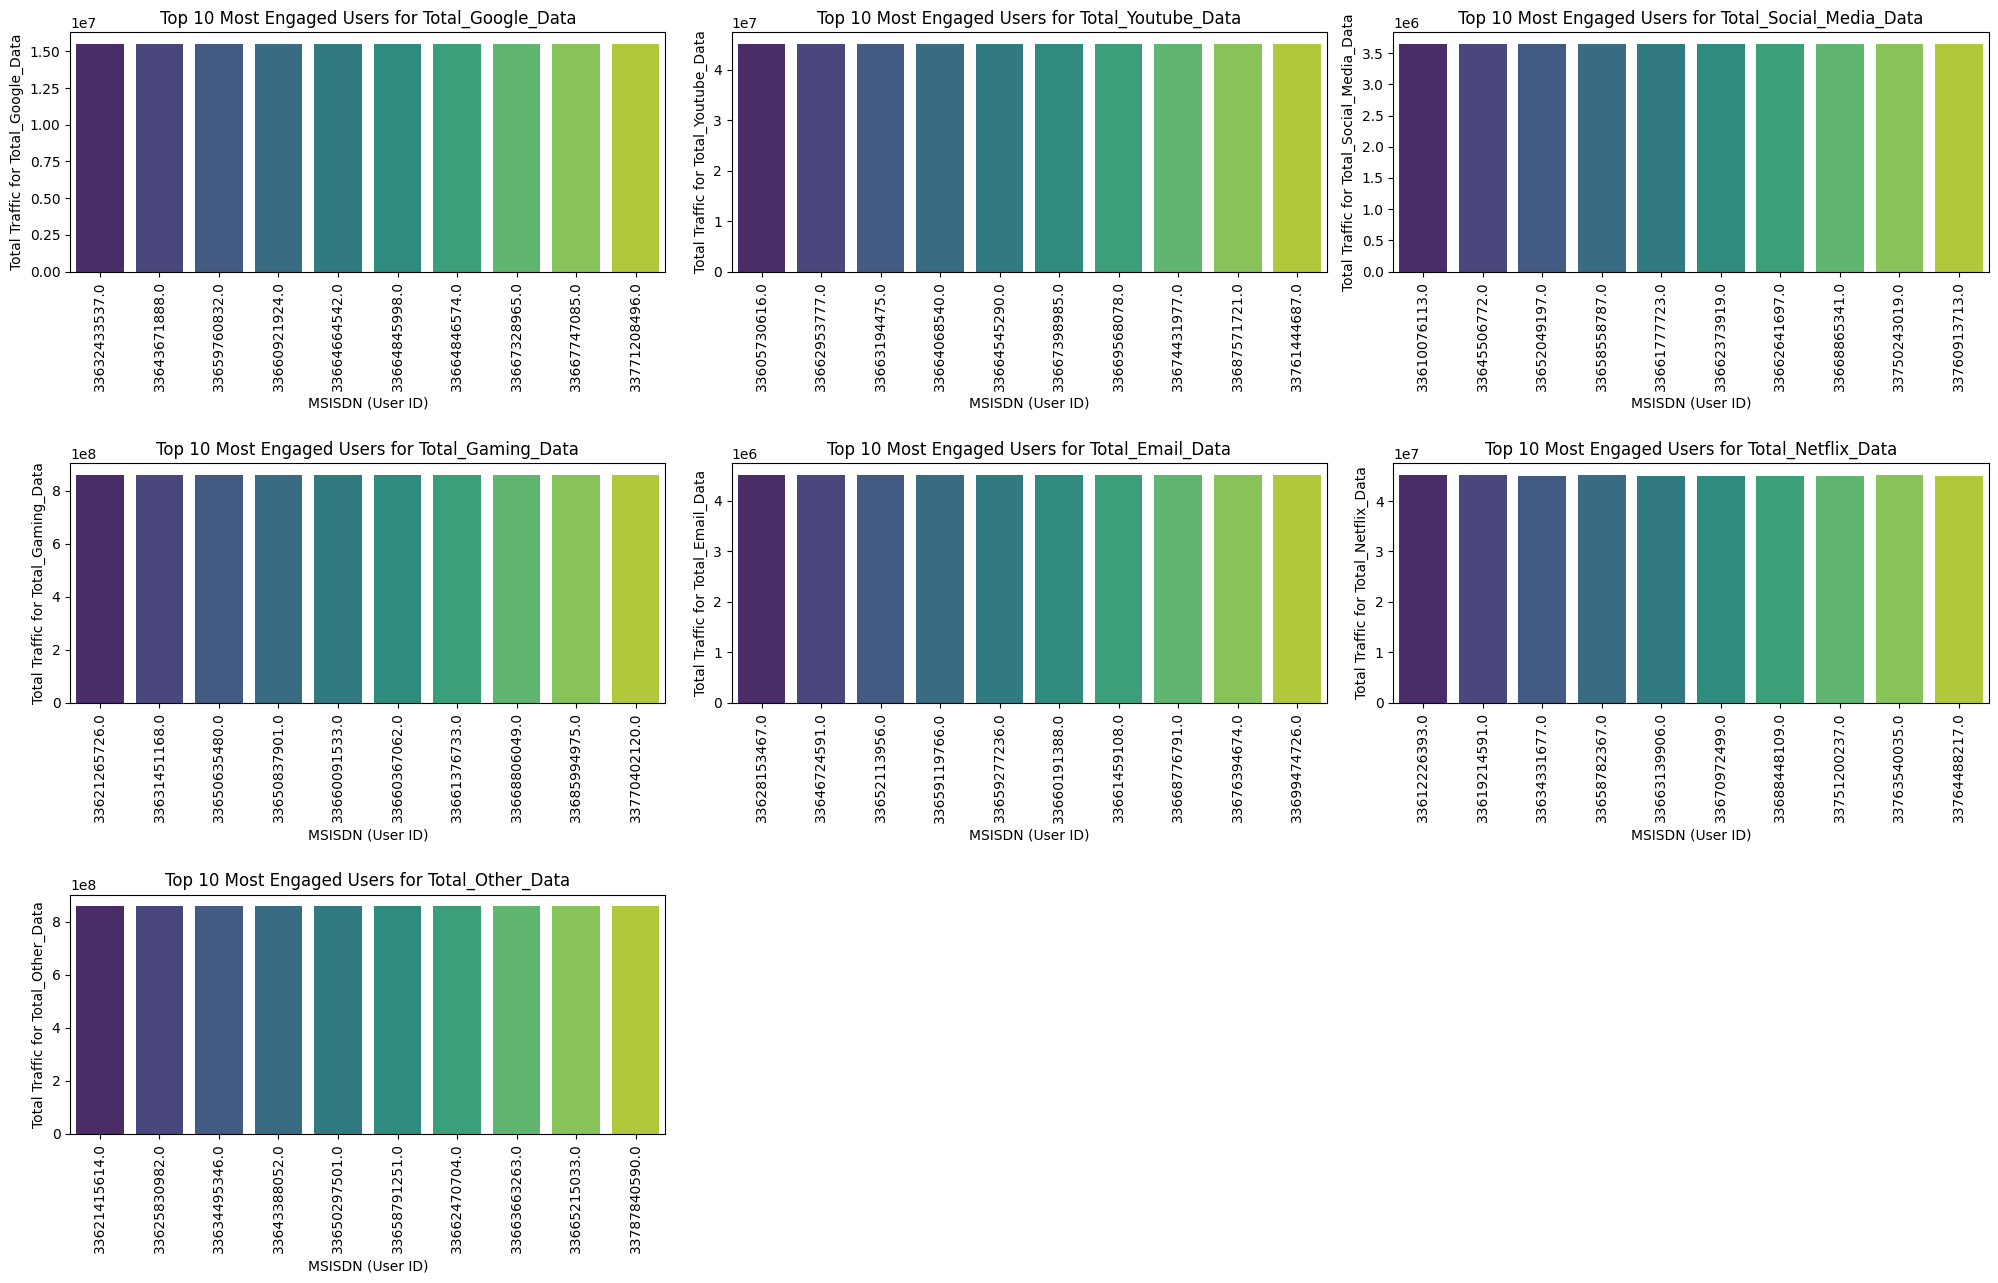

In [193]:
application_columns = ['Total_Google_Data', 'Total_Youtube_Data', 'Total_Social_Media_Data','Total_Gaming_Data','Total_Email_Data', 'Total_Netflix_Data', 'Total_Other_Data']

# Sum the traffic per user (MSISDN) for each application
df_app_traffic = df[['MSISDN/Number'] + application_columns]

# Rank users by total traffic for each application
top_10_per_application = {}

# For each application column, find the top 10 most engaged users
for app in application_columns:
    app_traffic = df_app_traffic[['MSISDN/Number', app]].sort_values(by=app, ascending=False).head(10)
    top_10_per_application[app] = app_traffic

# Display the top 10 users per application
for app, top_10 in top_10_per_application.items():
    print(f"Top 10 most engaged users for {app}:")
    print(top_10)
    print("\n")

# Visualize the top 10 engaged users per application
plt.figure(figsize=(20, 16))

# Create a barplot for each application
for i, app in enumerate(application_columns):
    plt.subplot(4, 3, i+1)
    sns.barplot(data=top_10_per_application[app], x='MSISDN/Number', y=app, palette='viridis')
    plt.title(f"Top 10 Most Engaged Users for {app}")
    plt.xlabel('MSISDN (User ID)')
    plt.ylabel(f'Total Traffic for {app}')
    plt.xticks(rotation=90)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

##### Top 3 Most Used Apps

C:\Users\bethelhem.teka\AppData\Local\Temp\ipykernel_22336\3741363846.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_apps.index, y=top_3_apps.values, palette='viridis')


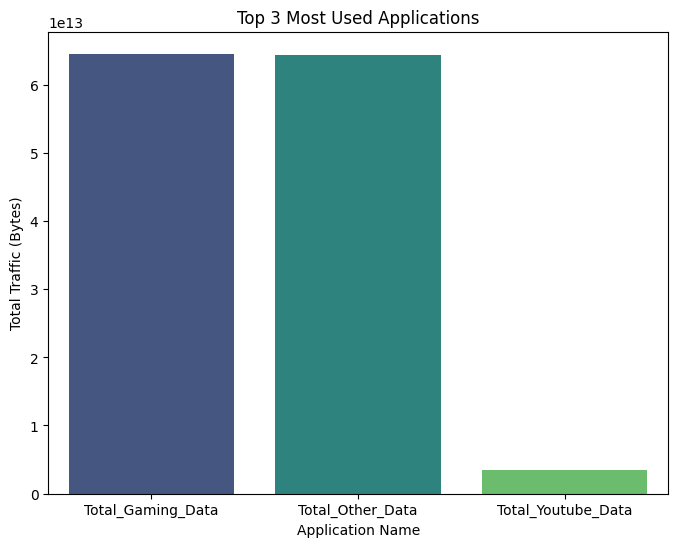

In [194]:
total_traffic_per_application = df[application_columns].sum()

# Sort the applications by total traffic in descending order
sorted_traffic = total_traffic_per_application.sort_values(ascending=False)

# Select the top 3 most used applications
top_3_apps = sorted_traffic.head(3)

# Plot the top 3 most used applications using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_apps.index, y=top_3_apps.values, palette='viridis')

# Title and labels
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application Name')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

##### Grouping users in k-engagement clusters based on the engagement metrics

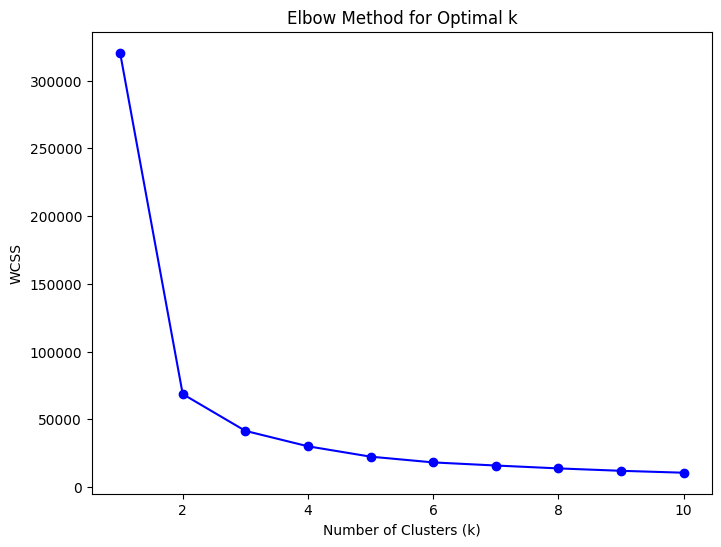

Cluster Centroids (mean values of each metric per cluster):
   sessions_frequency  total_duration  total_traffic
0            1.202823    1.147218e+05   5.960672e+08
1          522.000000    8.134293e+07   5.392201e+11
2            3.346327    4.746281e+05   1.684202e+09


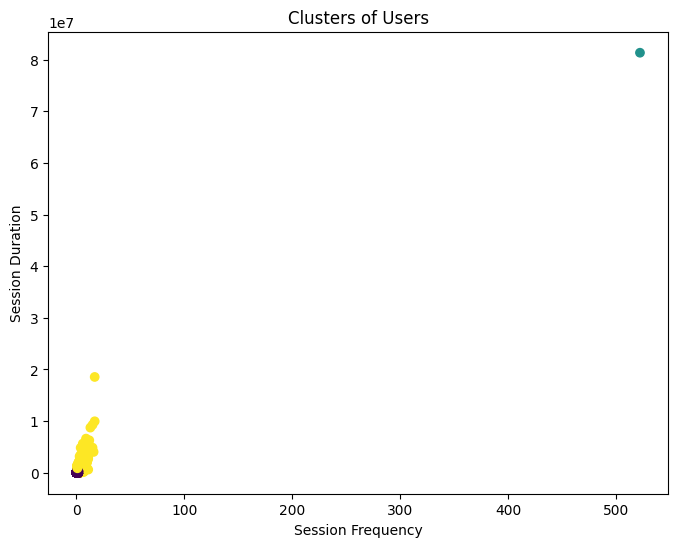

In [195]:
from sklearn.preprocessing  import StandardScaler
# Select relevant engagement metrics
engagement_metrics = ['sessions_frequency', 'total_duration', 'total_traffic']

# Normalize the data (Standardization)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(aggregated_data[engagement_metrics])

# Elbow Method to determine the optimal value of k
wcss = []  # Within-cluster sum of squares (WCSS)
for k in range(1, 11):  # Try k values from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


# Apply k-means with the optimal k 
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
aggregated_data['cluster'] = kmeans.fit_predict(df_scaled)

# Interpret the clusters
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=engagement_metrics)
print("Cluster Centroids (mean values of each metric per cluster):")
print(centroids)

# visualization
plt.figure(figsize=(8, 6))
plt.scatter(aggregated_data['sessions_frequency'], aggregated_data['total_duration'], c=aggregated_data['cluster'], cmap='viridis')
plt.title('Clusters of Users')
plt.xlabel('Session Frequency')
plt.ylabel('Session Duration')
plt.show()